# 8. Hafta Lab-2: Word Embeddings
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak


In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import preprocessing
from keras.layers.embeddings import Embedding
from keras.utils import plot_model
from IPython.display import Image
import numpy as np

Using TensorFlow backend.


#### IMDB veri kümesini kullan.

In [17]:
# En cok kullanılan kelime sayısı
max_features = 15000
# 100 kelimeden sonra yorumları kes
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 

In [18]:
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
X_train

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]])

In [19]:
print("X_train.shape :",np.matrix(X_train[2]).shape)

X_train.shape : (1, 200)


In [20]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

### Modeli oluştur

In [21]:
model = Sequential()
model.add(Embedding(max_features, maxlen, input_length=maxlen))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 200, 200)          3000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               5120128   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 8,120,257
Trainable params: 8,120,257
Non-trainable params: 0
_________________________________________________________________


In [22]:
# plot_model(model, show_shapes=True, to_file="we.png")
# Image("we.png")

### Modeli eğitelim

In [23]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=1024,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.6822 - acc: 0.5964 - val_loss: 0.5065 - val_acc: 0.7774
Epoch 2/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.3265 - acc: 0.8771 - val_loss: 0.4965 - val_acc: 0.7680
Epoch 3/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.1621 - acc: 0.9414 - val_loss: 0.3371 - val_acc: 0.8610
Epoch 4/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.0696 - acc: 0.9797 - val_loss: 0.3597 - val_acc: 0.8522
Epoch 5/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.0442 - acc: 0.9865 - val_loss: 0.3748 - val_acc: 0.8532
Epoch 6/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.0093 - acc: 0.9990 - val_loss: 0.4014 - val_acc: 0.8542
Epoch 7/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.0227 - acc: 0.9910 - val_loss: 0.4530 - val_acc:

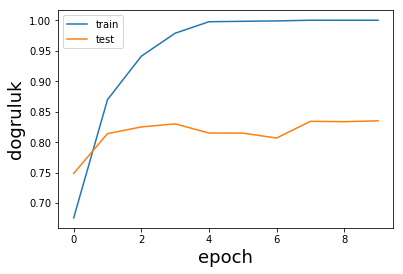

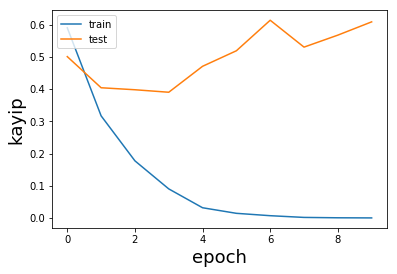

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

### Regularization kullanarak modeli tekrar eğitelim.

In [ ]:
from keras import regularizers

In [ ]:
model = Sequential()
model.add(Embedding(max_features, maxlen, input_length=maxlen, activity_regularizer=regularizers.l1(10e-7)))
model.add(Flatten())
model.add(Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-7)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=1024,
                    validation_split=0.2)

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()